<a href="https://colab.research.google.com/github/DINH20104022/2014022-Hung-Minh-Tran-Dinh/blob/main/nd_hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_set = train_data.flow_from_directory('/content/drive/MyDrive/DOWLOAD/Flower',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 20 images belonging to 22 classes.


In [3]:
test_set = train_data.flow_from_directory('/content/drive/MyDrive/DOWLOAD/Flower',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 20 images belonging to 22 classes.


In [5]:
train_set.class_indices

{'Hoa anh đào': 0,
 'Hoa ban': 1,
 'Hoa bồ công anh': 2,
 'Hoa cát tường': 3,
 'Hoa cẩm chướng': 4,
 'Hoa cẩm tú cầu': 5,
 'Hoa cúc': 6,
 'Hoa cứt lợn': 7,
 'Hoa giấy': 8,
 'Hoa hồng': 9,
 'Hoa hướng dương': 10,
 'Hoa lavender': 11,
 'Hoa lay ơn': 12,
 'Hoa ly': 13,
 'Hoa mai': 14,
 'Hoa mọc lan': 15,
 'Hoa mười giờ': 16,
 'Hoa phong lan': 17,
 'Hoa sen': 18,
 'Hoa thủy tiên': 19,
 'Nhan_dien_hoa.2': 20,
 'Nhan_dien_hoa.20': 21}

In [6]:
test_set.class_indices

{'Hoa anh đào': 0,
 'Hoa ban': 1,
 'Hoa bồ công anh': 2,
 'Hoa cát tường': 3,
 'Hoa cẩm chướng': 4,
 'Hoa cẩm tú cầu': 5,
 'Hoa cúc': 6,
 'Hoa cứt lợn': 7,
 'Hoa giấy': 8,
 'Hoa hồng': 9,
 'Hoa hướng dương': 10,
 'Hoa lavender': 11,
 'Hoa lay ơn': 12,
 'Hoa ly': 13,
 'Hoa mai': 14,
 'Hoa mọc lan': 15,
 'Hoa mười giờ': 16,
 'Hoa phong lan': 17,
 'Hoa sen': 18,
 'Hoa thủy tiên': 19,
 'Nhan_dien_hoa.2': 20,
 'Nhan_dien_hoa.20': 21}

In [7]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(22,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_set,epochs=100,batch_size=128,verbose=1, validation_data=test_set, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 73/100
1/1 [==============================] - 4s 4s/step - loss: 0.0788 - accuracy: 0.9500 - val_loss: 0.0316 - val_accuracy: 1.0000
Epoch 74/100
1/1 [==============================] - 4s 4s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 75/100
1/1 [==============================] - 4s 4s/step - loss: 0.0279 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 76/100
1/1 [==============================] - 4s 4s/step - loss: 0.0342 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 77/100
1/1 [==============================] - 4s 4s/step - loss: 0.1549 - accuracy: 0.9500 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 78/100
1/1 [==============================] - 4s 4s/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 79/100
1/1 [==============================] - 4s 4s/step - loss: 0.1115 - accuracy: 0.9500 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 80/100
1/1 [=========

In [10]:
model.save('Nhan_dien_hoa.1')

In [11]:
model_hoa = load_model('Nhan_dien_hoa.1')

In [9]:
Score=model.evaluate(train_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0016170140588656068
Train Accuracy 1.0


1/1 [==============================] - 0s 132ms/step
Đây là hoa: cuc


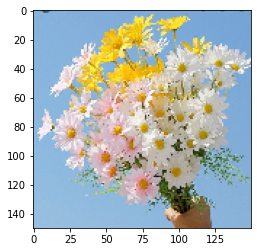

In [12]:
img = load_img('/content/hoa cuc.jpg',target_size = (150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_hoa.predict(img)
class_hoa=['mai','cẩm tú cầu','ly','lavender','hồng','anh đào', 'cuc']
a= int(np.argmax(model.predict(img),axis=1))
print("Đây là hoa:", class_hoa[a])